# Dataset Shift
## Implementing logistic regression on kmer data
### 7/13/2020 Code clean up

### Load libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
import sklearn

## The data: even split

### Load training sets 

In [2]:
# 10239 = virus
virus_train = pd.read_csv('Kmer Data/Train even split/outputfile_10239_train_10ksplit.csv', header=None)

# 2157 = archaea
archaea_train = pd.read_csv('Kmer Data/Train even split/outputfile_2157_train_10ksplit.csv', header=None)

# 2759 = eukaryote
eukaryote_train = pd.read_csv('Kmer Data/Train even split/outputfile_2759_train_10ksplit.csv', header=None)

# 2 = bacteria
bacteria_train = pd.read_csv('Kmer Data/Train even split/outputfile_2_train_10ksplit.csv', header=None)

### Load test sets

In [3]:
# 10239 = virus
virus_test = pd.read_csv('Kmer Data/Test even split/outputfile_10239_test_10ksplit.csv', header=None)

# 2157 = archaea
archaea_test = pd.read_csv('Kmer Data/Test even split/outputfile_2157_test_10ksplit.csv', header=None)

# 2759 = eukaryote
eukaryote_test = pd.read_csv('Kmer Data/Test even split/outputfile_2759_test_10ksplit.csv', header=None)

# 2 = bacteria
bacteria_test = pd.read_csv('Kmer Data/Test even split/outputfile_2_test_10ksplit.csv', header=None)

In [4]:
# taking virus and bacteria as first pass examples

virus_train.head(4)

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
0,tid|1247113|NC_019027.1|pos|555..5555,0.923856,0.744270,0.950885,0.776531,1.218364,0.603688,0.525217,-0.881697,0.603688,...,0.322276,-0.034399,-0.476232,-0.533390,-0.322081,-0.275561,-1.757166,-1.064018,-0.188550,-0.968708
1,tid|1007869|NC_021347.1|pos|16460..21460,-2.908672,-2.215525,-4.216956,-1.116912,-0.711447,-0.510777,-0.606087,0.135851,-2.908672,...,0.646676,1.381788,0.525315,1.579965,1.613117,1.623928,1.422061,0.458624,1.134379,1.098661
2,tid|1147146|NC_019723.1|pos|32665..37665,1.051232,0.302822,0.767127,0.723325,0.450458,0.044993,-0.015632,-0.080171,0.836120,...,-0.080171,-1.083473,-0.536929,-0.114072,-0.390325,-0.842311,-0.648155,-1.284143,-0.916419,-0.842311
3,tid|1236000|NC_020204.1|pos|13189..18189,0.574149,0.405527,0.733214,0.320369,0.804166,0.464950,0.297896,0.320369,0.405527,...,0.483998,0.097225,-3.486294,-0.395251,0.124624,-0.350799,-0.713705,-0.713705,-0.085096,-1.406852


In [5]:
bacteria_train.head(4)

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
0,tid|1310670|NZ_JEXS01000008.1|pos|102961..107961,1.477226,0.791683,1.446215,0.984055,0.645080,0.067764,0.919516,0.493849,1.293376,...,0.185547,-0.306929,-1.606212,-0.306929,0.098536,-0.564758,-0.689922,-0.507600,-0.402239,-1.606212
1,tid|1100828|NZ_KZ303840.1|pos|418339..423339,-4.064565,-1.147005,-4.064565,-2.756443,-0.271537,0.133929,0.076770,0.677544,-4.064565,...,1.114758,1.613005,0.709293,1.506237,0.981226,2.031049,1.286608,0.016146,1.463065,1.506237
2,tid|1249621|NZ_ANKP01000254.1|pos|20243..25243,-1.797869,-0.139641,-0.619214,-0.786268,-0.006109,0.111674,-1.104722,0.504716,-0.699257,...,0.342197,0.876280,0.504716,0.644478,1.197863,1.119902,1.400804,-0.699257,0.479398,0.926711
3,tid|1005518|NZ_AKLW01000071.1|pos|203..5203,-0.194704,0.161971,-0.092922,0.424335,0.234291,0.516143,0.056610,0.056610,-0.435866,...,0.257281,0.210761,-1.329684,0.028439,0.110677,0.110677,-0.754320,-0.636537,-0.000548,-0.435866


### Remove the first column from each data set

In [6]:
virus_train = virus_train.drop(labels=[0], axis = 1)
virus_test = virus_test.drop([0], axis = 1)

bacteria_train = bacteria_train.drop([0], axis = 1)
bacteria_test = bacteria_test.drop([0], axis = 1)

eukaryote_train = eukaryote_train.drop([0], axis = 1)
eukaryote_test = eukaryote_test.drop([0], axis = 1)

archaea_train = archaea_train.drop([0], axis = 1)
archaea_test = archaea_test.drop([0], axis = 1)


In [7]:
# quick visual confirm
virus_test.head(3)

# successfully removed the first column

,1,2,3,4,5,6,7,8,9,10,...,127,128,129,130,131,132,133,134,135,136
0,1.151937,0.821273,0.821273,0.861013,0.577651,0.230780,0.230780,0.206087,0.560259,0.323870,...,0.128126,-0.115496,-0.649579,0.128126,-0.438270,-0.150588,-1.873354,-1.180207,-0.438270,-1.084897
1,2.281440,1.172778,1.425774,1.608096,1.273582,0.767313,1.008475,-3.016877,0.972107,0.696695,...,0.384320,-0.308827,-0.531970,0.161177,0.509484,0.118617,-4.325161,-0.819652,-0.244288,-0.183664
2,1.039521,0.161803,0.661759,0.799380,0.312085,0.077245,0.357547,-0.615902,0.422086,0.312085,...,0.016621,-0.810058,-1.051220,0.106233,0.047392,-0.116911,-1.369674,-0.741065,-0.558744,-1.051220


In [8]:
virus_test.describe()

,1,2,3,4,5,6,7,8,9,10,...,127,128,129,130,131,132,133,134,135,136
count,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,...,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000
mean,0.690509,0.462850,0.502993,0.536703,0.598076,0.309945,0.364149,-0.109253,0.266177,0.319065,...,0.279391,-0.047368,-1.100607,-0.013944,-0.055836,-0.384030,-1.409690,-0.715855,-0.203151,-1.321033
std,0.962970,0.548283,0.940678,0.613724,0.426655,0.272487,0.490833,0.695189,0.954594,0.588165,...,0.339419,0.548357,1.140841,0.513201,0.448040,0.949714,1.394965,0.500410,0.652111,1.413436
min,-4.680319,-2.501494,-4.160824,-2.223106,-1.544223,-1.167070,-1.544223,-4.415136,-4.511126,-4.231728,...,-0.694762,-2.934649,-4.756667,-1.590454,-2.083291,-4.416759,-4.689750,-2.757709,-2.284142,-4.758439
25%,0.203977,0.167541,0.086959,0.275086,0.329228,0.149135,0.033441,-0.479573,-0.249895,-0.010224,...,0.035802,-0.388233,-1.313533,-0.312271,-0.369149,-0.942597,-2.184850,-0.999656,-0.618043,-2.024367
50%,0.786237,0.513475,0.577759,0.593001,0.600820,0.296540,0.389595,0.069304,0.383010,0.431130,...,0.266474,-0.065067,-0.813454,-0.027865,-0.014863,-0.418524,-1.188133,-0.748871,-0.185315,-1.009700
75%,1.296737,0.823681,1.134223,0.916507,0.870866,0.478158,0.723837,0.361015,0.842620,0.680238,...,0.500903,0.277808,-0.406336,0.231237,0.251660,0.298140,-0.494342,-0.405844,0.167522,-0.396624
max,2.764825,1.630281,2.684958,1.921679,1.625861,2.333396,1.578393,0.948130,2.473476,1.777087,...,1.346306,1.813794,0.613177,1.900460,1.689340,2.699499,2.381045,1.094319,2.011000,1.952631


# Visualize with histograms

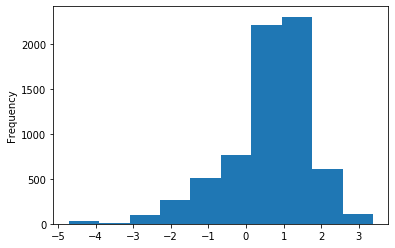

In [9]:
virus_train[1].plot.hist() 
# [1] indexes on the first column

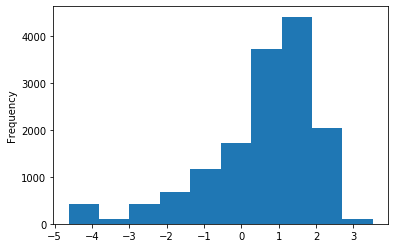

In [10]:
bacteria_train[1].plot.hist()

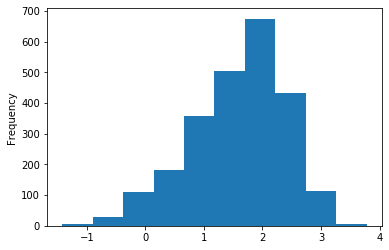

In [11]:
eukaryote_train[1].plot.hist()

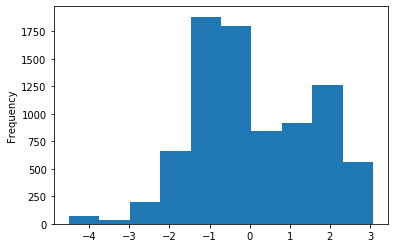

In [12]:
archaea_train[1].plot.hist()

# Data Wrangling and Preprocessing

Required modules

In [13]:
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import preprocessing 

# https://scikit-learn.org/stable/modules/preprocessing.html
#  transform the data to center it by removing the mean value (set mean = 0) 
# of each feature, then scale it by dividing non-constant features by their standard deviation.

Define the independent and dependent variables: Train set

In [14]:
#### starting with virus and bacteria ####
# we already have our train and test sets separated

# Append the training data sets together
# Binary variable 0 = bacteria; 1 = virus

X_train = virus_train.append(bacteria_train)
X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,127,128,129,130,131,132,133,134,135,136
0,0.923856,0.744270,0.950885,0.776531,1.218364,0.603688,0.525217,-0.881697,0.603688,0.346969,...,0.322276,-0.034399,-0.476232,-0.533390,-0.322081,-0.275561,-1.757166,-1.064018,-0.188550,-0.968708
1,-2.908672,-2.215525,-4.216956,-1.116912,-0.711447,-0.510777,-0.606087,0.135851,-2.908672,-1.299234,...,0.646676,1.381788,0.525315,1.579965,1.613117,1.623928,1.422061,0.458624,1.134379,1.098661
2,1.051232,0.302822,0.767127,0.723325,0.450458,0.044993,-0.015632,-0.080171,0.836120,0.389833,...,-0.080171,-1.083473,-0.536929,-0.114072,-0.390325,-0.842311,-0.648155,-1.284143,-0.916419,-0.842311
3,0.574149,0.405527,0.733214,0.320369,0.804166,0.464950,0.297896,0.320369,0.405527,0.124624,...,0.483998,0.097225,-3.486294,-0.395251,0.124624,-0.350799,-0.713705,-0.713705,-0.085096,-1.406852
4,1.264798,0.909457,1.319357,0.922702,0.766356,0.442117,0.652412,-0.075826,0.868635,0.280848,...,0.229555,-0.412299,-1.105446,-0.699981,-0.463592,-1.010136,-1.105446,-0.574818,-0.363509,-2.309419


In [15]:
# y variable: for all observations in virus_train dataset, make one dimension of "1" = a column of 1s
# the length of the virus_train dataset
y_train = [1 for x in range(virus_train.shape[0])]

# repeat for bacteria and extend y with the new values
y_train.extend([0 for x in range(bacteria_train.shape[0])])

Now we have y_train and X_train datasets 

Define the independent and dependent variables: Test set

In [16]:
X_test = virus_test.append(bacteria_test)
y_test = [0 for x in range(virus_test.shape[0])]
y_test.extend([1 for x in range(bacteria_test.shape[0])])

Standardize each feature (=column) in the training sets

In [17]:
# Standardize each feature (columns) in the traininng sets

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)

X_test_transformed = scaler.transform(X_test)
type(X_test_transformed)

numpy.ndarray

Los variables:

X_train_transformed

X_test_transformed

y_test

y_train

### Using logistic regression to predict taxa by kmer pattern similarity

The modules

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

reshuffle data for the model

In [19]:
# Check the Data types

print(type(y_test))
print(type(y_train))
print(type(X_train_transformed))
print(type(X_test_transformed))

<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [20]:
# convert y datasets from strings to arrays

y_test = np.array(y_test)
y_train = np.array(y_train)
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [21]:
# print arrays (rows, columns)

print(y_test.shape)
print(y_train.shape)
print(X_test_transformed.shape)
print(X_train_transformed.shape)

(3707,)
(21651,)
(3707, 136)
(21651, 136)


In [22]:
# Random order in the data

random_1 = np.random.permutation(len(X_train_transformed))
random_2 = np.random.permutation(len(X_test_transformed))

In [23]:
X_train_transformed = X_train_transformed[random_1][0:21651]
y_train = y_train[random_1][0:21651]

X_test_transformed = X_test_transformed[random_2][0:3707]
y_test = y_test[random_2][0:3707]

In [24]:
X = X_train_transformed
y = y_train

In [25]:
######### from prev code ###########

# X_train, X_test_shuffled, y_train, y_test_shuffled = train_test_split(
#    X, y,
#    shuffle=True,
#    test_size=21650,
#    random_state=1)

# train_test_split splits arrays or matrices into random train and test subsets
# shuffle = True --- shuffling 

## The Logistic Regression execution

In [26]:
logmodel = LogisticRegression(max_iter=100000)

# default set to l2 is ok

In [27]:
logmodel_fit = logmodel.fit(X_train_transformed, y_train)

logmodel_fit.score(X_test_transformed, y_test)

0.10871324521176154

performance = 0.11

Check the probabilities for the training set

In [28]:
prob_vir_bac = logmodel.predict_proba(X_train_transformed)

In [29]:
prob_vir_bac

array([[3.37248748e-02, 9.66275125e-01],
       [1.51849940e-01, 8.48150060e-01],
       [9.46090555e-01, 5.39094455e-02],
       ...,
       [4.86331729e-01, 5.13668271e-01],
       [9.99526627e-01, 4.73372615e-04],
       [9.50570932e-01, 4.94290676e-02]])

In [30]:
print(prob_vir_bac.shape)

prob_df = pd.DataFrame(data=prob_vir_bac,
                          columns=["prob_not_virus", "prob_virus"])


# add y_train to this df
prob_df['Group'] = y_train

print(type(prob_df))
prob_df.head()
# X_train_transformed

(21651, 2)
<class 'pandas.core.frame.DataFrame'>


,prob_not_virus,prob_virus,Group
0,0.033725,0.966275,1
1,0.151850,0.848150,1
2,0.946091,0.053909,0
3,0.929052,0.070948,0
4,0.925320,0.074680,0


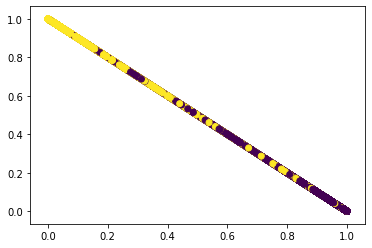

In [42]:
plt.scatter(prob_df.prob_not_virus,
            prob_df.prob_virus,
            c=prob_df.Group)

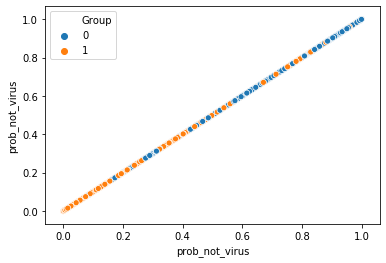

In [64]:
sns.scatterplot(x = prob_df.prob_not_virus, 
                y = prob_df.prob_not_virus,
               hue = prob_df.Group)


#### Now apply our regression model to the test data to see how it performs

In [48]:
predictions = logmodel.predict(X_test_transformed)
print(predictions)

[1 0 0 ... 0 1 0]


In [49]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[ 197,  986],
       [2318,  206]], dtype=int64)

               predicted not virus  | predicted virus
    actual no     197                        986
    actual yes    2318                       206               

## Metric: Dummy Classifier

DummyClassifier is a classifier that makes predicitions using simple rules

This classifier is a useful baseline to comapre with real classifiers
and is not to be used on real problems

In [50]:
from sklearn.dummy import DummyClassifier

In [65]:
# X = X_train_transformed
# y = y_train

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X)
dummy_clf.score(X, y)

0.6805690268347883

In [66]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_test_transformed, y_test)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X_test_transformed)
dummy_clf.score(X_test_transformed, y_test)

0.6808740221203129

# Remaining groups in even data set

## The data: uneven split